In [1]:
from matplotlib.ticker import MultipleLocator
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans 
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
stock_list = pd.read_csv('data/selected_stock_list.csv')['Code']
stock_dict = {}
for stock in stock_list:
    stock_dict[stock] = pd.read_csv('data/full/{}_full.csv'.format(stock), index_col=0)
date_list = stock_dict[stock_list.iloc[0]].index

In [3]:
X_dict = {}
X_transform_dict = {}
y_dict = {}
for date in date_list:
    X = pd.DataFrame(columns = stock_dict[stock_list.iloc[0]].columns)
    y = pd.DataFrame(columns = ['Return'])
    for stock in stock_list:
        X.loc[stock] = stock_dict[stock].loc[date]
        y.loc[stock] = stock_dict[stock]['Return'].loc[date]
    X_dict[date] = X
    X_transform_dict[date] = StandardScaler().fit_transform(X)
    y_dict[date] = y

Different metrics can be tested (to do)

In [92]:
def get_max_distance(X, alpha):
    pairwise_dist = pairwise_distances(X, metric='l2')
    nearest_distances = np.sort(pairwise_dist, axis=1)[:, 1]
    return np.quantile(nearest_distances, alpha)

In [74]:
# grid = {'alpha': np.linspace(start=0.01, stop=0.5, num=50)}
alpha = 0.21

In [75]:
return_list = []
for i, date in enumerate(date_list[: -1]):
    X = X_dict[date]
    max_distance = get_max_distance(X, alpha)
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=max_distance, linkage='average', metric='l2')
    label = pd.Series(clustering.fit_predict(X), index=stock_list)
    long_list = []
    short_list = []
    for j in range(label.nunique()):
        selected_stock_list = label[label.eq(j)].index
        if len(selected_stock_list) > 1:
            long_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[: len(selected_stock_list) // 2].index)
            short_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[-(len(selected_stock_list) // 2):].index)
    return_list.append(y_dict[date_list[i + 1]].loc[long_list].mean().iloc[0] - y_dict[date_list[i + 1]].loc[short_list].mean().iloc[0])
    print(label.nunique())
value_list = np.cumprod(1 + np.array(return_list))

309
309
309
309
307
308
309
310
311
309
307
307
307
310
311
310
309
309
306
310
309
308
308
311
311
310
306
309
310
308
310
309
310
307
309
308
308
312
305
309
311
309
309
310
309
309
310
308
310
308
309
310
310
309
310
310
310
309
309
307
308
310
305
308
311
307
312
310
311
311
310
307
310
311
308
311
310
309
309
313
310
307
310
308
308
308
309
309
308
307
310
310
310
311
311
312
311
311
310
308
308
311
309
310
309
310
312
311
312
308
308
311
310
309
309
306
311
310
306
309
310
310
307
309
308
310
308
310
310
311


In [76]:
value_list[-1]

1.5530530740029382

In [77]:
a = value_list

In [78]:
return_list = []
alpha = 0.4
for i, date in enumerate(date_list[: -1]):
    X = X_transform_dict[date]
    max_distance = get_max_distance(X, alpha)
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=max_distance, linkage='average', metric='l1')
    label = pd.Series(clustering.fit_predict(X), index=stock_list)
    long_list = []
    short_list = []
    for j in range(label.nunique()):
        selected_stock_list = label[label.eq(j)].index
        if len(selected_stock_list) > 1:
            long_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[: len(selected_stock_list) // 2].index)
            short_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[-(len(selected_stock_list) // 2):].index)
    return_list.append(y_dict[date_list[i + 1]].loc[long_list].mean().iloc[0] - y_dict[date_list[i + 1]].loc[short_list].mean().iloc[0])
value_list = np.cumprod(1 + np.array(return_list))
b = value_list

In [66]:
value_list

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [93]:
return_list = []
grid = {'alpha': np.linspace(start=0.01, stop=0.5, num=50)}
best_alpha1 = None
best_alpha2 = None
best_return = 1
best_sharpe = 0

for alpha in grid['alpha']:
    return_list = [0.]
    for i, date in enumerate(date_list[: -1]):
        X = X_dict[date]
        max_distance = get_max_distance(X, alpha)
        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=max_distance, linkage='average', metric='l2')
        label = pd.Series(clustering.fit_predict(X), index=stock_list)
        long_list = []
        short_list = []
        if label.nunique() == len(stock_list):
            return_list.append(return_list[-1])
            continue
        for j in range(label.nunique()):
            selected_stock_list = label[label.eq(j)].index
            if len(selected_stock_list) > 1:
                long_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[: len(selected_stock_list) // 2].index)
                short_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[-(len(selected_stock_list) // 2):].index)
        return_list.append(y_dict[date_list[i + 1]].loc[long_list].mean().iloc[0] - y_dict[date_list[i + 1]].loc[short_list].mean().iloc[0])
    value_list = np.cumprod(1 + np.array(return_list))
    if value_list[-1] > best_return:
        best_return = value_list[-1]
        best_alpha1 = alpha
        print(alpha, best_return)
    if np.std(value_list) != 0 and np.mean(value_list) / np.std(value_list) > best_sharpe:
        best_sharpe = np.mean(value_list) / np.std(value_list)
        best_alpha2 = alpha
        print(alpha, value_list[-1], np.mean(value_list) / np.std(value_list))

0.01 0.7507295374263949 3.5478228924164754
0.04 0.7599732822577505 5.377055247143585
0.05 1.156883494326556
0.05 1.156883494326556 6.618293767483433
0.06999999999999999 1.0889638628420228 7.633235151164526
0.08 1.028767900013434 8.583441258525292
0.09999999999999999 1.3331011522023932
0.11 1.3791128760546225
0.12 1.5231364028341483
0.13 1.636926921790368
0.14 1.7232648382261688
0.15000000000000002 1.7982978061324644
0.27 1.29330289389944 8.67539122192491
0.28 1.306289451755963 8.789862635913554


In [94]:
return_list = []
grid = {'alpha': np.linspace(start=0.01, stop=0.5, num=50)}
best_alpha1 = None
best_alpha2 = None
best_return = 1
best_sharpe = 0

for alpha in grid['alpha']:
    return_list = [0.]
    for i, date in enumerate(date_list[: -1]):
        X = X_transform_dict[date]
        max_distance = get_max_distance(X, alpha)
        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=max_distance, linkage='average', metric='l2')
        label = pd.Series(clustering.fit_predict(X), index=stock_list)
        long_list = []
        short_list = []
        if label.nunique() == len(stock_list):
            return_list.append(return_list[-1])
            continue
        for j in range(label.nunique()):
            selected_stock_list = label[label.eq(j)].index
            if len(selected_stock_list) > 1:
                long_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[: len(selected_stock_list) // 2].index)
                short_list += list(y_dict[date].loc[selected_stock_list].sort_values(by='Return').iloc[-(len(selected_stock_list) // 2):].index)
        return_list.append(y_dict[date_list[i + 1]].loc[long_list].mean().iloc[0] - y_dict[date_list[i + 1]].loc[short_list].mean().iloc[0])
    value_list = np.cumprod(1 + np.array(return_list))
    if value_list[-1] > best_return:
        best_return = value_list[-1]
        best_alpha1 = alpha
        print(alpha, best_return)
    if np.std(value_list) != 0 and np.mean(value_list) / np.std(value_list) > best_sharpe:
        best_sharpe = np.mean(value_list) / np.std(value_list)
        best_alpha2 = alpha
        print(alpha, value_list[-1], np.mean(value_list) / np.std(value_list))

0.01 0.694579040494724 7.694105320802508
0.02 0.7855621116570884 10.673808908203698
0.03 0.9063504217380991 18.62478580778815
0.04 0.9096752861023001 20.500442922862273
0.060000000000000005 0.919136763915216 22.760178172211923
0.06999999999999999 0.9824978804110938 28.455345065626886
0.08 1.009627211776286
0.08 1.009627211776286 34.23586760716528
0.12 1.0050803245263196 37.318750715423654
0.17 0.9079914814251192 37.47873498265174
0.18000000000000002 0.9215590930548166 39.94964886137958
0.2 0.9421221375123753 45.21247841250526
0.21000000000000002 0.9306905560993418 45.45623761775328
0.39 1.012968941326708
0.4 1.0214906041150178
0.47000000000000003 0.9607898732878536 46.82798969901043
0.5 1.0307948392036914


In [84]:
b = value_list

In [16]:
SPX = yf.download('^SPX', start='2013-06-01', end='2023-12-31', period='1d')['Adj Close'].resample('ME').last()

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 0, 'Date')

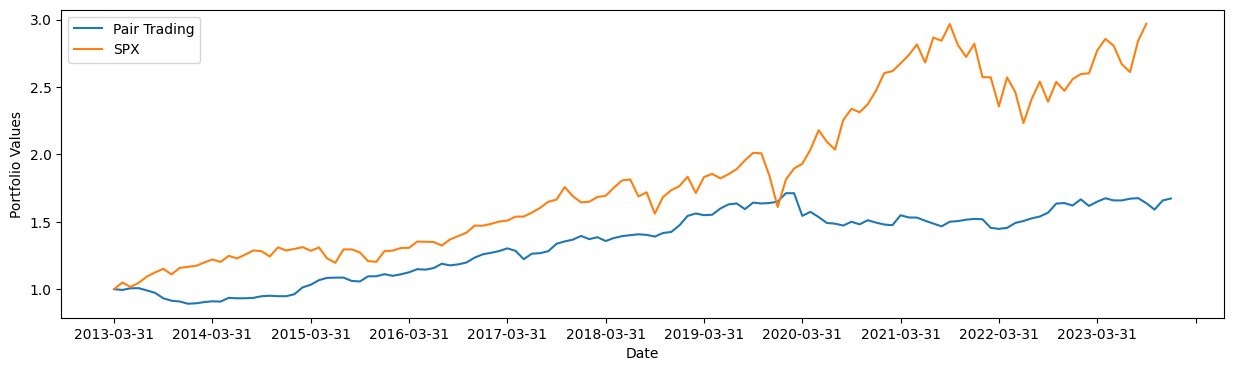

In [9]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(date_list, [1] + list(value_list), label='Pair Trading')
plt.plot(SPX.values / SPX.iloc[0], label='SPX')
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.legend()
plt.ylabel("Portfolio Values")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

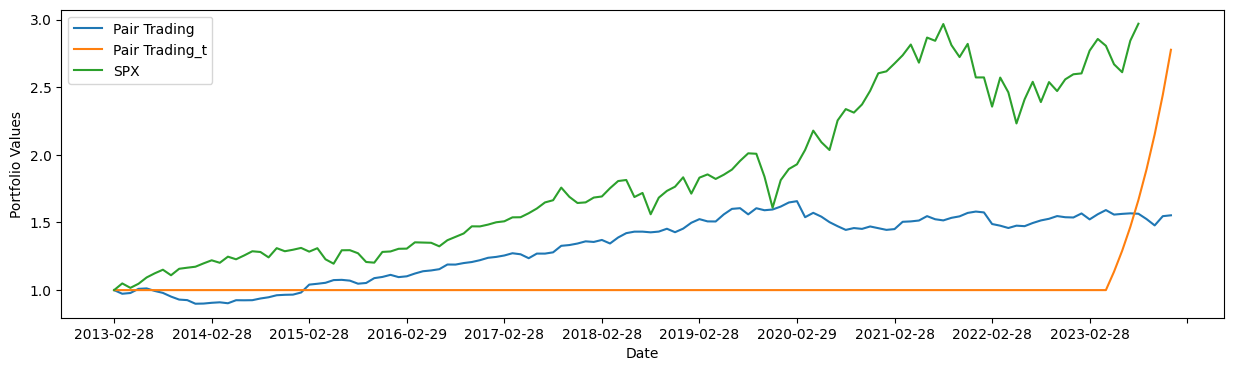

In [86]:
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(date_list, [1] + list(a), label='Pair Trading')
plt.plot(date_list, list(b), label='Pair Trading_t')
plt.plot(SPX.values / SPX.iloc[0], label='SPX')
ax.xaxis.set_major_locator(MultipleLocator(12))
plt.legend()
plt.ylabel("Portfolio Values")
plt.xlabel("Date")

In [20]:
b[len(b) - 1]

0.9084312959584344

In [33]:
a[-1]

1.6725968465688208